# **Cvičení 2: Zvukové signály a Fourierova transformace**

---
Nejprve si načteme všechny potřebné knihovny

In [1]:
# nejprve načteme balíčky, které budeme potřebovat
import numpy as np  # knihovna NumPy pro lineární algebru
import matplotlib.pyplot as plt  # knihovna Matplotlib pro vykreslování
from IPython.display import Audio  # interaktivní prvek pro přehrávání zvuku
from scipy.io import wavfile  # načítání zvukového souboru wav
from scipy import signal as sgn  # scipy modul pro zpracování signálů

---
# Část 1: Úvod do zvukových signálů
---
**Co je to zvukový signál v počítači?**

Zvukový signál v počítači je digitální reprezentace akustických vln, konkrétně průběhu tlaku vzduchu v čase. Jelikož nejsme schopni zaznamenat kontinuální průběh v čase, je nutné se spokojit pouze s hodnotami v určitých časových okamžicích. 

- **Vzorkovací frekvence ($f_s$)**: Počet vzorků zvukového signálu získaných za sekundu. Vyjadřuje se v hertzech (Hz).

Jelikož zvukový signál je záznamem vlnění v čase, je přirozené, že se bude jednat o periodický průběh. 

- **Frekvence ($f$)**: Počet opakování (period) vlny za sekundu. Vyjadřuje se v hertzech (Hz).

## (1.1) Vytváření zvukového signálu v Pythonu pomocí Numpy

### Úkol 1: Vytvořte zvukový signál
- s frekvencí 440 Hz (použijte sinusoidu),
- s délkou 5 sekund,
- za použití vzorkovací frekvence 44100 Hz.

(Použijte NumPy funkce `np.sin`, `np.linspace` a konstantu `np.pi`.)

In [2]:
# Parametry signálu
omegas = 440  # Frekvence v Hz (A4 tón)
fs = 44100  # Vzorkovací frekvence v Hz
trvani = 5.0  # Trvání signálu v sekundách

# Generování časové osy
t = np.linspace(start=0, stop=trvani, num=int(fs * trvani), endpoint=False)

# Generování signálu
signal = np.sin(2 * np.pi * omegas * t)

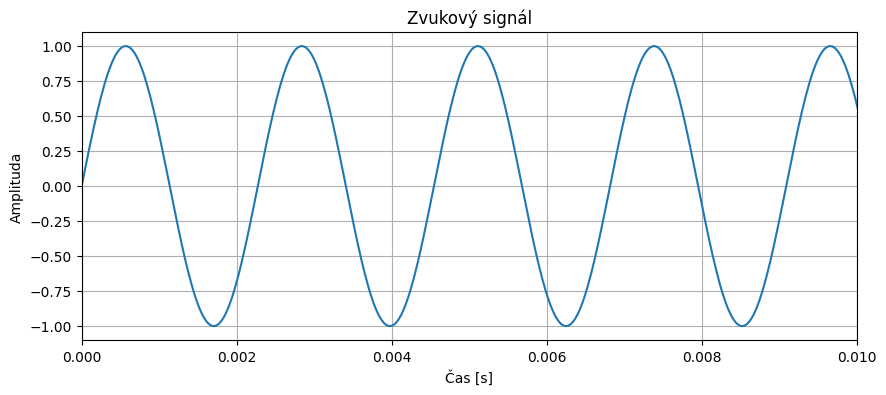

In [3]:
# Vykreslení signálu
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.xlim(0, 0.01)  # Zobrazení pouze prvních 10 ms, jinak bychom moc nepoznali
plt.title("Zvukový signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid()
plt.show()

##### Ukázka přehrávání zvuku v Pythonu


In [ ]:
Audio(signal, rate=fs)

### (1.1.1): Složení zvukového signálu z více vln

V reálném světě nejsou zvukové signály obvykle tvořeny pouze jednou sinovou vlnou, ale jsou složením několika vln s různými frekvencemi, amplitudami a různými fázemi. Každý zvuk, který slyšíme, může být rozložen na sérii sinových nebo kosinových vln různých frekvencí, amplitud a fází.

$$x(t) = a_1 \sin (b_1 2 \pi t + c_1) + a_2 \sin (b_2 2 \pi t + c_2) + \ldots$$

- $a_n$ je amplituda $n$-té vlny,
- $b_n$ je frekvence $n$-té vlny,
- $c_n$ je fáze $n$-té vlny.

Poznámka: $a_n$, $b_n$ a $c_n$ nemusí být v reálných signálech pouze konstanty, ale mohou to být i funkce času $t$. Typicky se amplitudy pro běžné signály (jako jsou tóny klavíru) pomalu zmenšují v čase, neboť se energie struny postupně ztrácí.

### Úkol 2: Vytvoření složeného zvukového signálu

Vytvořte složený zvukový signál
- složený ze 3 sinových vln,
- s amplitudami $a_1=1$, $a_2=0.5$ a $a_3=0.25$,
- s frekvencemi $b_1 = 440$ Hz, $b_2 = 880$ Hz a $b_3 = 1320$ Hz,
- a fázemi $c_1=0$, $c_2=\pi/2$ a $c_3=\pi$.


In [ ]:
# Parametry signálu
fs = 44100  # Vzorkovací frekvence v Hz
trvani = 5.0  # Trvání signálu v sekundách

# Frekvence komponent
frekvence_komponent = [440, 880, 1320]  # Frekvence v Hz (A4, A5, E6)

# Amplitudy komponent
amplitudy_komponent = [1.0, 0.5, 0.25]  # Amplitudy (1, 0.5, 0.25)

# Fázové posuny komponent
fazove_posuny_komponent = [0, np.pi / 2, np.pi]  # Fázové posuny (0, pi/2, pi)

In [ ]:
# Generování časové osy
t = np.linspace(0, trvani, int(fs * trvani), endpoint=False)

# Generování složeného signálu
signal = np.zeros_like(t)

# zip sloučí seznamy do jednoho seznamu pro jednodušší iteraci
for a, f, p in zip(amplitudy_komponent, frekvence_komponent, fazove_posuny_komponent):
    signal += a * np.sin(2 * np.pi * f * t + p)

In [ ]:
# Vykreslení signálu
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.xlim(0, 0.01)  # Zobrazení pouze prvních 10 ms, jinak bychom moc nepoznali
plt.title("Složený zvukový signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid()
plt.show()

**Můžeme si zvuk opět přehrát:**


In [ ]:
Audio(signal, rate=fs)

## (1.2) Jak vypadá skutečný zvukový signál?

Ze souboru A4.waw nahrajeme nahrávku zvuku noty na klavíru a zobrazíme si její graf.


In [ ]:
# Načtení WAV souboru
audio_path = 'A4.wav'
fs, signal = wavfile.read(audio_path)

In [ ]:
# Výpočet délky zvuku v sekundách
delka_nahravky = len(signal) / fs

# Generování časové osy
casova_osa = np.linspace(0, delka_nahravky, len(signal))

# Vykreslení zvukové vlny
plt.figure(figsize=(10, 4))
plt.plot(casova_osa, signal)
plt.title('Zvuková vlna souboru A4.wav')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda')
plt.show()

# Ještě jednou, ale s omezeným rozsahem
plt.figure(figsize=(10, 4))
plt.plot(casova_osa, signal)
plt.xlim(0, 0.01)  # Zobrazení pouze prvních 10 ms, jinak bychom moc nepoznali
plt.title('Zvuková vlna souboru A4.wav')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda')
plt.show()

Opět přehrajeme zvuk v Pythonu.


In [ ]:
Audio(signal, rate=fs)

---
# Část 2: Úvod do Fourierovy transformace
---

**Co je Fourierova transformace?**

Fourierova transformace je matematický nástroj, který umožňuje rozložit složený zvukový signál na jednotlivé sinové a kosinové vlny různých frekvencí. Tedy pro zadaný zvukový signál $x(t)$ nám pomůže určit amplitudy $a_n$, frekvence $b_n$ a fáze $c_n$ přítomných vln.


**Výpočet Fourierovy transformace**

Fourierovou transformací signálu $ x(t) $ získáme funkci $ F(\omega) $, kde $ \omega $ je frekvence [Hz]. $ F(\omega) $ nabývá hodnot z komplexních čísel, ale pro náš účel nám stačí výsledek chápat jako vektor dvou hodnot 
$$ F(\omega) = (F_{\cos}(\omega),~F_{\sin}(\omega)), $$
 kde první složkou $ F_{\cos}(\omega) $ je zastoupení kosinové vlny s frekvencí $ \omega $ a druhou složkou $ F_{\sin}(\omega) $ je zastoupení sinové vlny s frekvencí $ \omega $.

Uvažujme nyní, že náš signál "zní" (tedy je nenulový) pouze v intervalu $ t \in [a, b] $. Potom lze obě složky Fourierovy transformace vyjádřit jako:
 

$$ F_{\cos}(\omega) = \int_{a}^{b} x(t) \cos( 2 \pi \omega t) dt, $$

$$ F_{\sin}(\omega) = - \int_{a}^{b} x(t) \sin( 2 \pi \omega t) dt. $$


My samozřejmě nejsme v obecném případě schopni spočítat celou funkci $F(\omega)$, ale jednoduše ji zvládneme vyhodnotit pro libovolné $\omega$.


## (2.1) Numerická integrace pomocí obdélníkového pravidla

Pro sestavení Fourierovy transformace potřebujeme výpočet integrálů. 

Pro konkrétní signál:
- například $ x(t) =  t^2 - 2t$ pro $ t \in [0, 2] $,
- a frekvenci $ \omega = \frac{1}{8}   $ Hz.

Musíme vypočítat:

$$ F_{\cos}\left(\frac{1}{8} \right) = \int_{0}^{2} (t^2 - 2t) \cos\left(\frac{1}{8}  2 \pi t\right) dt, $$
$$ F_{\sin}\left(\frac{1}{8} \right) = - \int_{0}^{2} (t^2 - 2t) \sin\left(\frac{1}{8}  2 \pi t\right) dt = \int_{0}^{2} (- t^2 + 2t) \sin\left(\frac{1}{8}  2 \pi t\right) dt. $$

- integrál nezáporné spojité funkce se dá představit jako obsah plochy ohraničené grafem funkce (integrandu), osou $x$ a přímkami $x=a$ a $x=b$, v případě, že integrujeme zápornou spojitou funkci, je integrál této funkce dán jako záporný obsah plochy.
    - v našem případě je integrovaná funkce na některých částech integrovaného intervalu kladná a na některých záporná. Celková plocha je tedy plocha na "kladných částech" mínus plocha na "záporných částech".
- náš signál $x(t)$ je však typicky dán pouze v diskrétních bodech (dle vzorkovací frekvence)
- můžeme tedy plochu pod křivkou aproximovat pomocí obdélníků (viz obrázek)
    - pro sinovou část
    - grafická ukázka pro vzorkovací frekvenci 4 Hz

**Postup výpočtu:**
- na vstupu máme signál = vektor hodnot `x` a jeho vzorkovací frekvenci `fs`
- vytvoříme si vektor časových okamžiků `t` odpovídajících jednotlivým vzorkům: `t = np.arange(len(x)) / fs`
    - šířky obdélníků jsou tedy `1/fs`
- pro zadanou frekvenci `omega` vypočítáme hodnoty `sin` a `cos` pro jednotlivé časové okamžiky: 
    - `fsin = - np.sin(2 * np.pi * omega * t)`  
    - `fcos = np.cos(2 * np.pi * omega * t)`
- spočítáme si diskretizované hodnoty integrandu: 
    - `integrand_sin = x * fsin`  
    - `integrand_cos = x * fcos`
- vypočítáme aproximaci integrálu = součet ploch obdélníků: 
    - `Fsin = np.sum(integrand_sin) / fs`  
    - `Fcos = np.sum(integrand_cos) / fs`

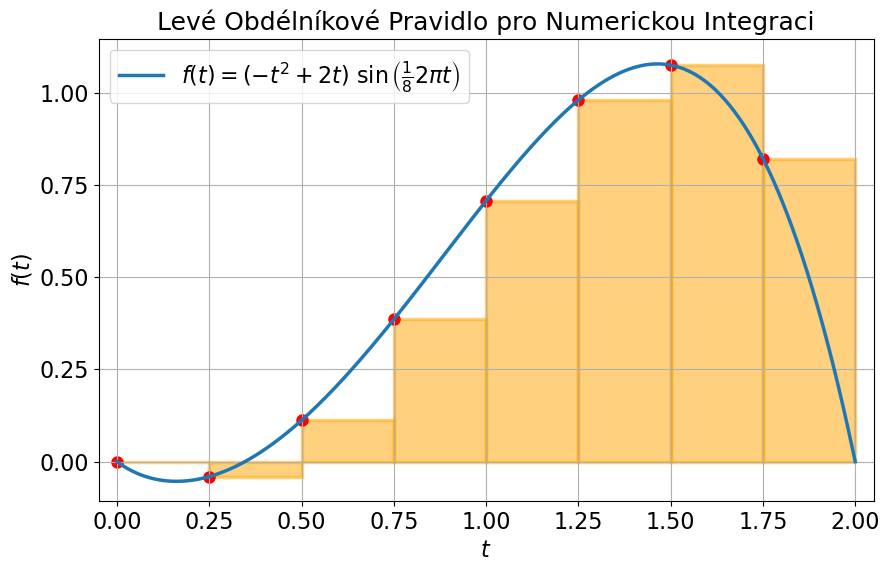

### Úkol 3: Spočtěte ($F_{\cos}(200)$, $F_{\sin}(200)$) ,($F_{\cos}(440)$, $F_{\sin}(440)$), ($F_{\cos}(880)$, $F_{\sin}(880)$) a ($F_{\cos}(1320)$, $F_{\sin}(1320)$) pro signál ze souboru `A4.wav`
- použijte postup popsaný výše
- nebojte se použít cyklus

In [ ]:
# Načtení WAV souboru
audio_path = 'A4.wav'
fs, signal = wavfile.read(audio_path)

omegas = [200, 440, 880, 1320]  # Frekvence v Hz (A4, A5, E6)

In [ ]:
t = np.arange(len(signal)) / fs

for omega in omegas:
    fcos = np.cos(2 * np.pi * omega * t)
    fsin = - np.sin(2 * np.pi * omega * t)

    Fcos = np.sum(signal * fcos) * (1 / fs)
    Fsin = np.sum(signal * fsin) * (1 / fs)

    print(f"Kosinová složka pro omega = {omega}: {Fcos}")
    print(f"Sinová složka pro omega = {omega}: {Fsin}")

## (2.2) Fourierova transformace

Zkusíme se nyní podívat na výsledek Fourierovy transformace pro celou sekvenci frekvencí. Dále si ukážeme, jak konkrétní hodnoty $F_{\cos}(\omega)$ a $F_{\sin}(\omega)$ souvisí s parametry vlny $a_n$, $b_n$ a $c_n$.

Vraťme se k předchozímu syntetickému signálu:

In [ ]:
# Parametry signálu
fs = 44100  # Vzorkovací frekvence v Hz
trvani = 5.0  # Trvání signálu v sekundách

# Frekvence komponent
frekvence_komponent = [440, 880, 1320]  # Frekvence v Hz (A4, A5, E6)

# Amplitudy komponent
amplitudy_komponent = [1.0, 0.5, 0.25]  # Amplitudy (1, 0.5, 0.25)

# Fázové posuny komponent
fazove_posuny_komponent = [0, np.pi / 2, np.pi]  # Fázové posuny (0, pi/2, pi)

# Generování časové osy
t = np.linspace(0, trvani, int(fs * trvani), endpoint=False)

# Generování složeného signálu
signal = np.zeros_like(t)

#  zip sloučí seznamy do jednoho seznamu pro jednodušší iteraci
for a, f, p in zip(amplitudy_komponent, frekvence_komponent, fazove_posuny_komponent):
    signal += a * np.sin(2 * np.pi * f * t + p)

### Úkol 4: Vypočítejte Fourierovu transformaci (sinové a kosinové složky pro frekvence 1 až 2000 Hz) pro zadaný signál

In [ ]:
# spočteme Fourierovu transformaci pro celočíselné frekvence od 1 do 2000
omegas = np.arange(1, 2001)

t = np.arange(len(signal)) / fs

Fsin_all = np.zeros_like(omegas, dtype=float)
Fcos_all = np.zeros_like(omegas, dtype=float)

for i, omega in enumerate(omegas):
    fsin = -np.sin(2 * np.pi * omega * t)
    fcos = np.cos(2 * np.pi * omega * t)
    Fsin_all[i] = np.sum(signal * fsin) * (1 / fs)
    Fcos_all[i] = np.sum(signal * fcos) * (1 / fs)

Nyní si vykreslíme výslednou Fourierovu transformaci.

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(omegas, Fcos_all, label="kosinová část")
plt.plot(omegas, Fsin_all, label="sinová část", linestyle='dashed')
plt.legend()
plt.show()

Které frekvence jsou v signálu přítomny?


- `np.where` vrací indexy prvků, které splňují podmínku (konkrétně list indexů v jednotlivých dimenzích - zde pouze jeden, neboť se jedná o vektor).


In [ ]:
# [0] -> chceme souřadnice v 1. dimenzi
idx = np.where(np.sqrt(Fsin_all**2 + Fcos_all**2) > 1e-6)[0]
print(f"Nezanedbatelné jsou pouze frekvence {omegas[idx]}.")

Zkusíme z těchto výsledků dopočítat parametry původního signálu.

Pomůže nám k tomu obrázek.


In [ ]:
plt.figure(figsize=(6, 6))

for i in idx:
    plt.plot(Fcos_all[i], Fsin_all[i], 'o', label=f"omega={omegas[i]}")
    plt.plot([0, Fcos_all[i]], [0, Fsin_all[i]], 'k--')  # type: ignore

# přidáme kružnici
circle = plt.Circle((0, 0), 1 * 2.5, color='black', fill=False)  # type: ignore
plt.gca().add_patch(circle)

# nastavíme stejnou škálu pro osy x a y
plt.axis('equal')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(np.arange(-1, 1.25, 0.25) * 2.5)
plt.yticks(np.arange(-1, 1.25, 0.25) * 2.5)
plt.xlabel("Kosinová část")
plt.ylabel("Sinová část")
plt.legend()
plt.show()

Zopakujme si, jaké bylo zadání:

```
frekvence = [440, 880, 1320]
amplitudy = [1.0, 0.5, 0.25]
fazove_posuny = [0, np.pi / 2, np.pi]
```

Tedy:
- přítomné frekvence jsou ty, pro které jsme dostali "nenulové" hodnoty $F_{\cos}(\omega)$ nebo $F_{\sin}(\omega)$
- amplituda je **2x** vzdálenost od středu k vrcholu **děleno trváním signálu**
    - amplituda nezávisí na délce signálu, ale výsledek integrálu ano
- fázový posun je rotace o daný úhel v komplexní rovině

**Proč je amplituda 2x vzdálenost od středu k vrcholu?**

- ve skutečnosti Fourierova transformace $ F(\omega) $ je definována i pro záporná $\omega$ (tj. pro záporné frekvence).
- tedy stejný výsledek (akorát s převráceným znaménkem pro sinovou složku) bychom dostali i pro frekvenci $-\omega$.
- abychom tedy při inverzní Fourierově transformaci dostali původní signál, jsou kladné frekvence pouze s polovinou původní amplitudy.


## (2.3) Amplitudové spektrum

Nejčastější informací, kterou z Fourierovy transformace požadujeme, je **amplitudové spektrum**
- = velikosti amplitud jednotlivých frekvencí.
- Ty umíme spočitat vzorcem: $$\frac{2}{T} \sqrt{F_{\cos}(\omega)^2 + F_{\sin}(\omega)^2}, $$ kde $T$ je délka signálu v sekundách.

### Úkol 5: Spočítejte amplitudové spektrum pro signál ze souboru `A4.wav` pro frekvence 1 až 4000 Hz

- použijte postup z minulého úkolu

In [ ]:
# Načtení WAV souboru
audio_path = 'A4.wav'
fs, signal = wavfile.read(audio_path)

In [ ]:
# spočteme Fourierovu transformaci pro celočíselné frekvence od 1 do 4000
omegas = np.arange(1, 4001)

t = np.arange(len(signal)) / fs
trvani = len(signal) / fs

amplitudove_spektrum = np.zeros(len(omegas))

for i, omega in enumerate(omegas):
    fsin = -np.sin(2 * np.pi * omega * t)
    fcos = np.cos(2 * np.pi * omega * t)
    Fsin = np.sum(signal * fsin) * (1 / fs)
    Fcos = np.sum(signal * fcos) * (1 / fs)
    amplitudove_spektrum[i] = np.sqrt(Fsin**2 + Fcos**2) * 2 / trvani

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(omegas, amplitudove_spektrum, label="amplitudové spektrum")
plt.legend()
plt.show()

Vidíme základní frekvenční složku (440Hz) a její harmonické frekvence (její násobky).


---
# Část 3: Okenní Fourierova transformace
---
**Co je to Okenní Fourierova transformace (WFT)?**

Pokud máme delší zvukový signál, který obsahuje různé tóny v různých časových sekcích, nebude nám stačit jednoduchá Fourierova transformace. 
- Dala by nám totiž pouze celkový pohled na signál bez informace o časech výskytu jednotlivých frekvencí. 
- Okenní Fourierova transformace je způsob, jak získat frekvenční složky signálu v čase.
  - je to vlastně Fourierova transformace aplikovaná na krátké časové úseky signálu. 
  - Výsledkem je 2D matice, která obsahuje frekvenční složky signálu v čase.

Tedy:

- Vybereme si ze signálu sérii stejně dlouhých časových úseků (okének),
  - obvykle definujeme `velikost_okna` a 
  - `posun_okna`, o který pak okénko posouváme.
- Pro každé okénko spočítáme Fourierovu transformaci v předem stanovených frekvencích.
- Výsledkem je matice, kde na ose x je čas a na ose y jsou frekvence.


In [ ]:
# načteme data ze souboru
fs, signal = wavfile.read('butterfly.wav')

Přehrajeme si zvukový signál.


In [ ]:
Audio(signal, rate=fs)

Zvolíme si velikost okna a posun okna.

Můžeme to udělat v sekundách a použít vzorkovací frekvenci pro výpočet počtu vzorků v okně a posunu okna.


In [ ]:
delka_okna_sekundy = 0.1
posun_okna_sekundy = 0.01

velikost_okna = int(delka_okna_sekundy * fs)
posun_okna = int(posun_okna_sekundy * fs)

print(f"Velikost okna: {velikost_okna}")
print(f"Posun okna: {posun_okna}")

### Úkol 6: Pro zadaný signál, velikost okna a posun okna vypočítejte okenní Fourierovu transformaci a uložte velikosti amplitud do matice

- Použijte základní frekvence tónů klavíru
    - $\omega_i = f_i = 440 \cdot 2^{\frac{i-49}{12}} $, pro $i = 1, \ldots, 88$
- můžete použít `list` pro ukládání výsledků v jednotlivých oknech
    - pak můžete pomocí `np.stack` vytvořit z listu vektorů matici = časově-frekvenční spektrogram


In [ ]:
f_n = 440 * 2**((np.arange(1,89)-49)/12)

Z minulého úkolu také už víme, jak sestavit amplitudové spektrum, zabalíme si tento výpočet do funkce:

In [ ]:
def spocti_amplitudove_spektrum(signal, fs, omegas):
    t = np.arange(len(signal)) / fs  # časová osa
    trvani = len(signal) / fs  # trvání signálu

    amplitudove_spektrum = np.zeros(len(omegas))

    for i, omega in enumerate(omegas):
        fsin = -np.sin(2 * np.pi * omega * t)
        fcos = np.cos(2 * np.pi * omega * t)
        Fsin = np.sum(signal * fsin) * (1 / fs)
        Fcos = np.sum(signal * fcos) * (1 / fs)
        amplitudove_spektrum[i] = np.sqrt(Fsin**2 + Fcos**2) * 2 / trvani

    return amplitudove_spektrum

In [ ]:
okenni_FT = []  # zde budeme ukládat výsledky (amplitudová spektra pro jednotlivá okénka)
casy = []  # zde budeme ukládat časy, pro které jsme vypočítali amplitudová spektra

pocet_oken = 0

zacatek_okna = 0
konec_okna = velikost_okna

omegas = f_n  # frekvence odpovídající tónům klavíru

while konec_okna <= len(signal):
    okno = signal[zacatek_okna:konec_okna]  # vybereme okénko ze signálu
    casy.append((konec_okna + zacatek_okna) / 2 / fs)  # čas je uprostřed okna
    
    okenni_FT.append(spocti_amplitudove_spektrum(okno, fs, omegas))  # vypočítáme amplitudové spektrum pro okénko
    
    zacatek_okna += posun_okna
    konec_okna += posun_okna
    pocet_oken += 1

casove_frekvencni_matice = np.vstack(okenni_FT).T  # chceme mít čas na ose x, tedy ve sloupcích

print(f"Počet okének: {pocet_oken}")


Vykreslíme obrázek pomocí funkce `plt.pcolormesh`
  - první parametr jsou hodnoty na ose x
  - druhý parametr jsou hodnoty na ose y
  - třetí parametr je matice hodnot, které chceme vykreslit
  - můžeme použít parametr `cmap` pro změnu barevného schématu

In [ ]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(casy, omegas, casove_frekvencni_matice, cmap='jet')
plt.colorbar()
plt.xlabel('Čas (s)')
plt.ylabel('Frekvence (Hz)')
plt.show()

</br>
</br>
</br>
</br>
</br>
</br>

---
---
---
---
# Bonusové materiály:
---



# Část B1: Diskrétní a rychlá Fourierova transformace aneb jak to funguje v praxi?
---
Použitý postup je poměrně neefektivní, v praktických aplikacích (komprese zvuku, obrazu,...) se Fourierova transformace počítá tisíce až miliony krát za vteřinu (a to i na zařízeních, které se vám vejdou na zápěstí). 

Navíc pracujeme s diskrétními signály. Integraci jsme nahradili sumou skrze jednotlivé body. Jedná se o tzv. Diskrétní Fourierovu Transformaci (DFT).

Při DFT v principu nepočítáme s frekvencemi ve spojitém čase, ale s frekvencemi ve vzorkovaném čase tedy vůči počtu vzorků. Neboť samotná DFT "neví" o použité vzorkovací frekvenci.

**DFT**

Máme-li signál $x$ o délce $N$, pak při DFT získáme komplexní vektor o stejné délce:
$$X = \text{DFT}(x),$$
tedy počítáme Fourierovu transformaci pouze pro vybrané frekvence $k$:

$$ k=0,\ldots,  N-1$$


$$ F_{\cos}(k) = \text{Re}(X[k]) = \sum_{n=0}^{N-1} x[n]  \cos\left(\frac{2\pi kn}{N}\right) $$

$$ F_{\sin}(k) = \text{Im}(X[k]) = -\sum_{n=0}^{N-1} x[n]  \sin\left(\frac{2\pi kn}{N}\right) $$

Pokud chceme znát skutečné frekvenční složky, které jsou v signálu přítomny, musíme je přepočítat na frekvence ve spojitém čase.  Na toto použijeme vzorkovací frekvenci $f_s$:

$$ \omega = \frac{k f_s}{N}$$

Pro tyto výpočty se používají "chytré" implementace, které využívají vlastností $\sin$ a $\cos$. Nejznámější je tzv. Fast Fourier Transform (FFT), která využívá symetrie a periodičnosti sinových a kosinových funkcí.

**A samozřejmě je její implementace v knihovně numpy.**


In [ ]:
# Parametry signálu
fs = 44100  # Vzorkovací frekvence v Hz
trvani = 5.0  # Trvání signálu v sekundách

# Frekvence komponent
frekvence_komponent = [440, 880, 1320]  # Frekvence v Hz (A4, A5, E6)

# Amplitudy komponent
amplitudy_komponent = [1.0, 0.5, 0.25]  # Amplitudy (1, 0.5, 0.25)

# Fázové posuny komponent
fazove_posuny_komponent = [0, np.pi / 2, np.pi]  # Fázové posuny (0, pi/2, pi)

# Generování časové osy
t = np.linspace(0, trvani, int(fs * trvani), endpoint=False)

# Generování složeného signálu
signal = np.zeros_like(t)

# zip sloučí seznamy do jednoho seznamu pro jednodušší iteraci
for a, f, p in zip(amplitudy_komponent, frekvence_komponent, fazove_posuny_komponent):
    signal += a * np.sin(2 * np.pi * f * t + p)

In [ ]:
fft_result = np.fft.fft(signal)

plt.figure(figsize=(10, 4))
plt.plot(np.real(fft_result), label="kosinová část")  # reálná část je kosinová část
plt.plot(np.imag(fft_result), label="sinová část")  # imaginární část je sinová část
plt.legend()
plt.show()

**Co to vlastně vidíme?**

- Symetrie ve výsledcích DFT pro reálné signály je důsledkem

$$ \text{Re}(X[k]) = \text{Re}(X[N-k]) $$
$$ \text{Im}(X[k]) = -\text{Im}(X[N-k]) $$

- Jelikož zpracováváme reálný signál, stačí nám pouze první polovina výsledku DFT, využijeme tedy funkci `np.fft.rfft`
    
- Hodnoty na ose $y$ jsou mnohem vyšší, neboť DFT nevrací "skutečný integrál" pouze nenormalizovanou sumu
    - musíme vydělit počtem vzorků (délkou signálu) $N$ a přenásobit délkou signálu v čase $T$ (tj. $N/f_s$) = tedy pouze vydělit vzorkovací frekvencí $f_s$.

**Jak tedy z výsledků DFT získáme kosínové a sinové složky v závislosti na frekvenci?**

- `np.fft.fftfreq`/`np.fft.rfftfreq` vrací frekvence odpovídající jednotlivým prvkům výsledku DFT.
    - parametr `n` je délka signálu
    - parametr `d` je "krok" mezi jednotlivými vzorky v sekundách, tedy $d=\frac{1}{f_s}$

Kdybychom toto chtěli udělat ručně, museli bychom si vypočítat frekvence odpovídající jednotlivým prvkům výsledku DFT zvlášť pro kladnou (první polovina výsledku) a zápornou (druhá polovina výsledku) frekvenci.

Pro kladnou frekvenci bychom použili vzorec:

```
N = len(signal)
vzorkovaci_frekvence = 44100
freq = np.arange(N) / N * vzorkovaci_frekvence

```


### Úkol B1: Vypočítejte DFT pro zadaný signál a replikujte předchozí graf spektra

- použijte `np.fft.rfft` pro výpočet DFT
- použijte `np.fft.rfftfreq` pro výpočet frekvencí odpovídajících jednotlivým prvkům výsledku DFT (osa `x`)
- nezapomeňte na normalizaci
- vykreslete pouze pro frekvence 0 až 500 Hz

In [ ]:
N = len(signal)
fs = 44100

# DFT signálu (pouze první polovina)
fft_result = np.fft.rfft(signal)

# Frekvence pro každý bod DFT
x_axis_freqs = np.fft.rfftfreq(n=N, d=1 / fs)

# Rozdělení DFT výsledku na reálnou a imaginární složku a normalizace
normalizace = 1 / fs
Fcos_all = fft_result.real * normalizace
Fsin_all = fft_result.imag * normalizace

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(x_axis_freqs, Fcos_all, label="kosinová část")
plt.plot(x_axis_freqs, Fsin_all, label="sinová část", linestyle='dashed')
plt.legend()
plt.xlim(0, 2000)
plt.show()

### Amplitudové spektrum

Nejčastější informací, kterou potřebujeme získat o signálu, je pouze amplitudové spektrum. 

In [ ]:
normalizace = 1 / fs
trvani = len(signal) / fs
amplitudove_spektrum = np.abs(fft_result) * 2 * normalizace / trvani

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(x_axis_freqs, amplitudove_spektrum, label="amplitudové spektrum")
plt.legend()
plt.xlim(0, 2000)
plt.show()

**Úkol B1: Jak tedy vypadá amplitudové spektrum noty A4 z našeho příkladu?**
Za použití `np.fft.rfft` a `np.fft.rfftfreq` vykreslete spektrum (0 až 5000Hz) noty A4 (`A4.wav`) z našeho příkladu.

In [ ]:
# Načtení WAV souboru
audio_path = 'A4.wav'
fs, signal = wavfile.read(audio_path)

# Vypočítání DFT signálu
N = len(signal)
fft_result = np.fft.rfft(signal)

# Frekvence pro každý bod DFT
x_axis_freqs = np.fft.rfftfreq(n=N, d=1 / fs)

# Rozdělení DFT výsledku na reálnou a imaginární složku
normalizace = 1 / fs
trvani = len(signal) / fs
amplitudove_spektrum = np.abs(fft_result) * 2 * normalizace / trvani

plt.figure(figsize=(10, 4))
plt.plot(x_axis_freqs, amplitudove_spektrum, label="amplitudové spektrum")
plt.legend()
plt.xlim(0, 5000)
plt.show()

Vidíme základní frekvenční složku (440Hz) a její harmonické frekvence (její násobky).


Jelikož jsou zvukové soubory uloženy v 16-bitovém formátu, tak hodnoty vzorků (tlaku vzduchu) jsou celočíselné hodnoty v rozsahu $[-2^{15}, 2^{15}-1]$. Tedy výsledné amplitudy nejsou pro nás uplně čitelné. 

Proto budeme signály před zpracováním normalizovat na rozsah $[-1, 1]$, pomocí podělení jeho maximální hodnotou (v absolutní hodnotě).

In [ ]:
signal_normalizovany = signal / np.max(np.abs(signal))
fft_result = np.fft.rfft(signal_normalizovany)

amplitudove_spektrum = np.abs(fft_result) * 2 * normalizace / trvani

plt.figure(figsize=(10, 4))
plt.plot(x_axis_freqs, amplitudove_spektrum, label="amplitudové spektrum")
plt.legend()
plt.xlim(0, 5000)
plt.show()